In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('spam (1).csv',encoding = 'latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2752,ham,Sat right? Okay thanks...
1922,ham,I'll be in sch fr 4-6... I dun haf da book in ...
3898,ham,ÌÏ mean it's confirmed... I tot they juz say o...
4725,ham,Jason says it's cool if we pick some up from h...
3321,ham,Ok darlin i supose it was ok i just worry too ...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [10]:
df.sample()

,target,text
5329,ham,"Sir, waiting for your letter."


### Now making the ham and spam in binary form that is 0 and 1's

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Checking for duplicate and missing values in the dataset

In [14]:
df.isnull().sum()


target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df.shape

(5572, 2)

### Removing the duplicate items

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

### Counting the number of spam and ham


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

## Visualizing the Data using bar plot


([<matplotlib.patches.Wedge at 0x1dbc7f5d4b0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

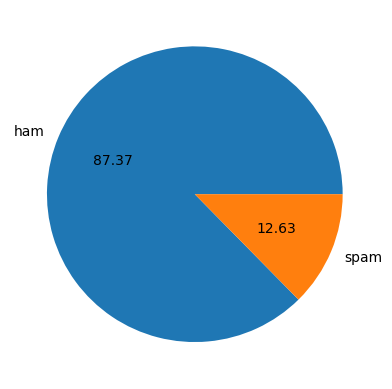

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

## Counting the number of Characters

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Using tokenizers for number of words

In [25]:
df['text'].apply(lambda x:nltk.word_tokenize(x)) # sepreat each words with a comma

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

## Counting the number of words in the dataset

In [26]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
 df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


## Counting the number of Sentences

In [29]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Getting the details of the dataset

In [31]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.947185,18.453279
std,58.236293,1.362406,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


 # Analysing for Ham

In [32]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


## Analysing for spam

In [33]:
df[df['target'] == 1][['num_words','num_sentences','num_characters']].describe()

,num_words,num_sentences,num_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.967841,137.891271
std,7.008418,1.483201,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,8.000000,224.000000


### - 0 ---- > Ham
### - 1 ----- > Spam

### Visulaizing the data with seaborn and differentating between the number of character in spam and ham

In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

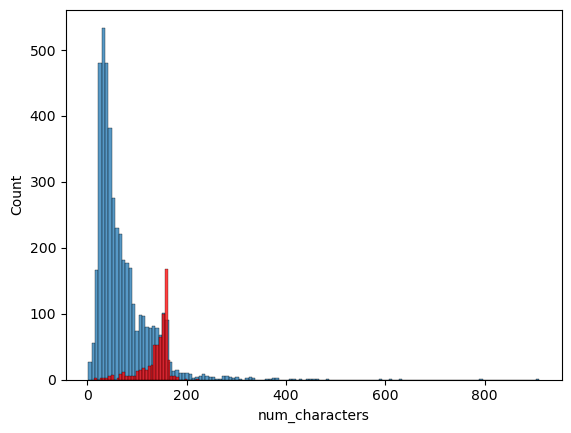

In [35]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

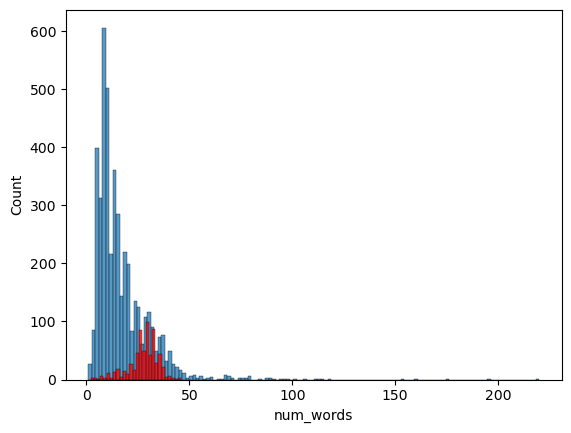

In [36]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

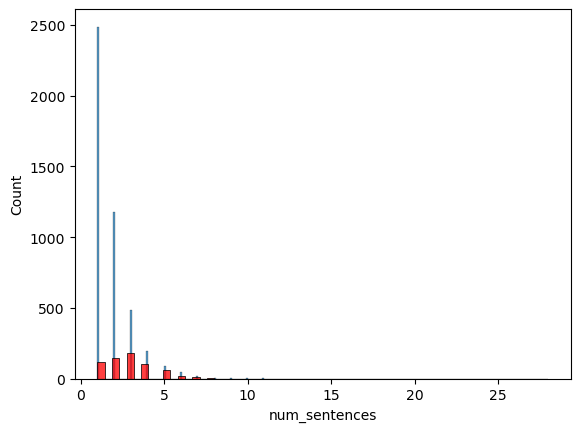

In [37]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

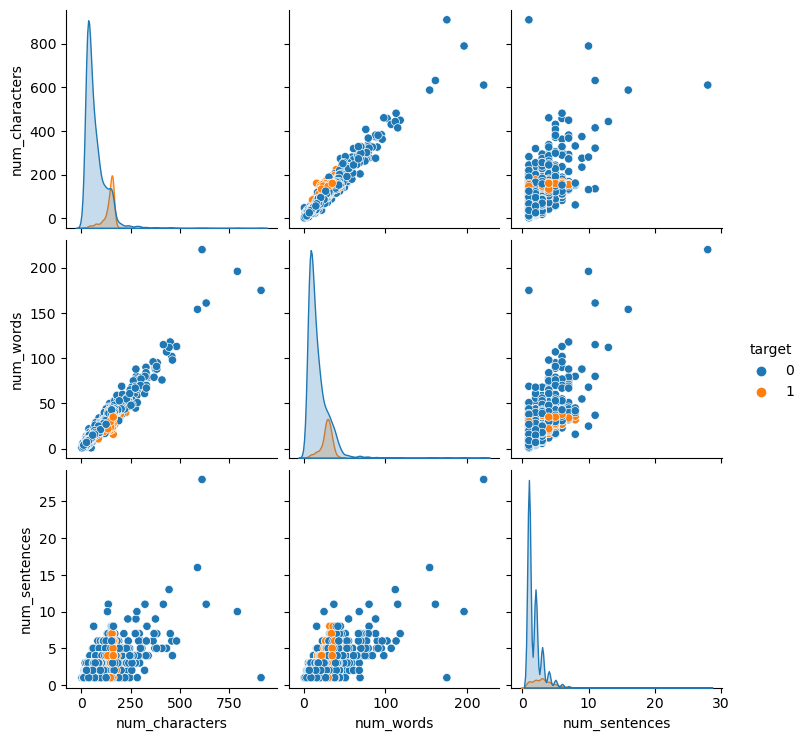

In [38]:
sns.pairplot(df,hue='target')

C:\Users\karti\AppData\Local\Temp\ipykernel_7912\1095980529.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,annot_kws={'size':12})


<Axes: >

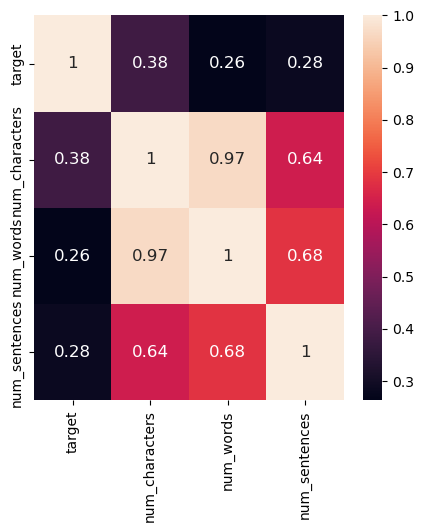

In [39]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':12})

In [40]:
from nltk.corpus import stopwords
import string
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Data Preprocessing 

In [41]:
def text_transformation(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # removing the special characters
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [42]:
text_transformation("But i'll b going 2 sch on mon. My sis need 2 take smth")

NameError: name 'ps' is not defined

In [43]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [44]:
from nltk.stem.porter import PorterStemmer # this will give me a short 
# word with that meaning
ps = PorterStemmer()

ps.stem('Loving')


'love'

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df['transformed_text'] = df['text'].apply(text_transformation)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Generating a World cloud

In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=300,height=300,min_font_size=10,background_color='white')


In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

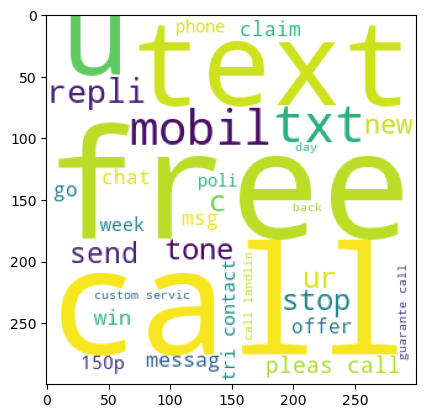

In [50]:
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

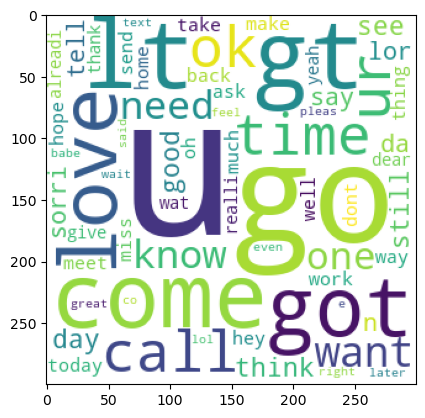

In [52]:
plt.imshow(ham_wc)

### Searching for word which has been repeated mulitple time


In [53]:
spam_corus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    #splitting each word 
    for word in msg.split():
        spam_corus.append(word)
        


In [54]:
len(spam_corus)

9939

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corus).most_common(30))[0],pd.DataFrame(Counter(spam_corus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

### Model Building 

In [107]:
# we need to convert it into vectors
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [108]:
X = tfid.fit_transform(df['transformed_text']).toarray() # conveting them into vectors

In [109]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
X.shape

(5169, 3000)

In [111]:
y = df['target'].values # output for the model traning

In [112]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [113]:
from sklearn.model_selection import train_test_split


In [114]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## Using Navie Bias Algorithm : GaussianNB, MultinomailNB, BernouliNB

In [115]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [116]:
grb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [117]:
grb.fit(X_train,y_train)
y_pred1 = grb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [118]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [119]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### tfidf ----- > MNB


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier # classification
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier # same as the random forest
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [92]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [93]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [94]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

## Example for traning the classifier with the train_classifier function

In [95]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [96]:
# looping through all the classifiers and storing their accuracy score and precision scores
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    # taking all the classifiers one by one
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968


In [100]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [101]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [102]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


<Figure size 500x500 with 0 Axes>

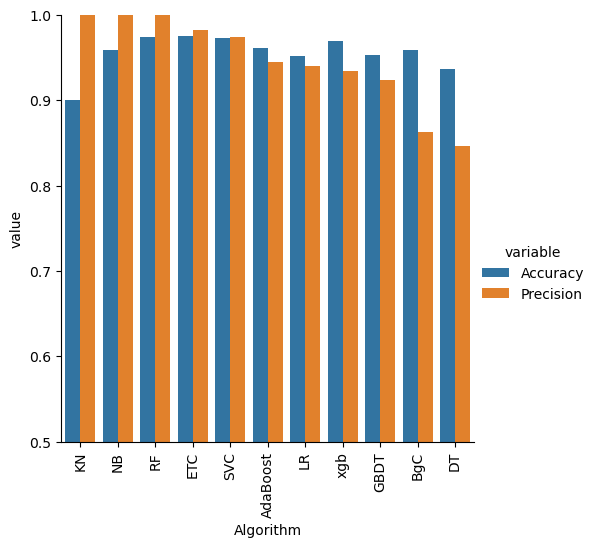

In [105]:
plt.figure(figsize=(5,5))
sns.catplot(x='Algorithm',y='value', hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
import pickle

In [120]:
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))